In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'C:\Users\jonas\OneDrive\Github\EBA-3500\site':
  os.chdir(r'C:\Users\jonas\OneDrive\Github\EBA-3500\site')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\jonas\AppData\Local\Temp\ipykernel_19604\3518293376.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\stat.py": 1662380252.0, "C:\\Users\\jonas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\_collectio

In [2]:
import numpy as np
rng = np.random.default_rng(seed = 313)
rng

Generator(PCG64) at 0x247B8D7FBC0

In [3]:
rng.uniform(0, 1, size = 10)

array([0.63182242, 0.46427464, 0.77927765, 0.40253182, 0.61196237,
       0.32392294, 0.10567386, 0.68671495, 0.01786417, 0.60813899])

In [4]:
rng.uniform(0, 1, size = (2, 10))

array([[0.77322932, 0.23260444, 0.56660324, 0.96823875, 0.93026402,
        0.71578432, 0.29358623, 0.53439132, 0.81535993, 0.42267216],
       [0.96857697, 0.96626312, 0.24506702, 0.44363894, 0.45995697,
        0.86179148, 0.45618709, 0.90139015, 0.51322552, 0.93442797]])

In [5]:
rng1 = np.random.default_rng(seed = 313)
rng2 = np.random.default_rng(seed = 313)
(rng1.uniform(0, 1, size = (2, 2)), rng2.uniform(0, 1, size = (2, 2)))

(array([[0.63182242, 0.46427464],
        [0.77927765, 0.40253182]]),
 array([[0.63182242, 0.46427464],
        [0.77927765, 0.40253182]]))

In [6]:
rng1 = np.random.default_rng()
rng2 = np.random.default_rng()
(rng1.uniform(0, 1, size = (2, 2)), rng2.uniform(0, 1, size = (2, 2)))

(array([[0.29638707, 0.19384254],
        [0.45017782, 0.98514409]]),
 array([[0.21254057, 0.8582812 ],
        [0.40646138, 0.00169709]]))

In [7]:
rng1 = np.random.default_rng(seed = 313)
rng2 = np.random.default_rng(seed = 313)
x = rng1.uniform(2, 5, size = (2, 2)) # starting at 2 and ending at 5,
y = rng2.uniform(0, 1, size = (2, 2)) # starting at 0 and ending at 1.

(x, 3*y + 2)

(array([[3.89546727, 3.39282392],
        [4.33783294, 3.20759547]]),
 array([[3.89546727, 3.39282392],
        [4.33783294, 3.20759547]]))

In [8]:
x = rng1.uniform(2, 5, size = (3, 4))
x

array([[3.8358871 , 2.97176881, 2.31702157, 4.06014485],
       [2.05359251, 3.82441698, 4.31968797, 2.69781331],
       [3.69980971, 4.90471626, 4.79079206, 4.14735295]])

In [9]:
x = rng1.normal(0, 1, 10000)

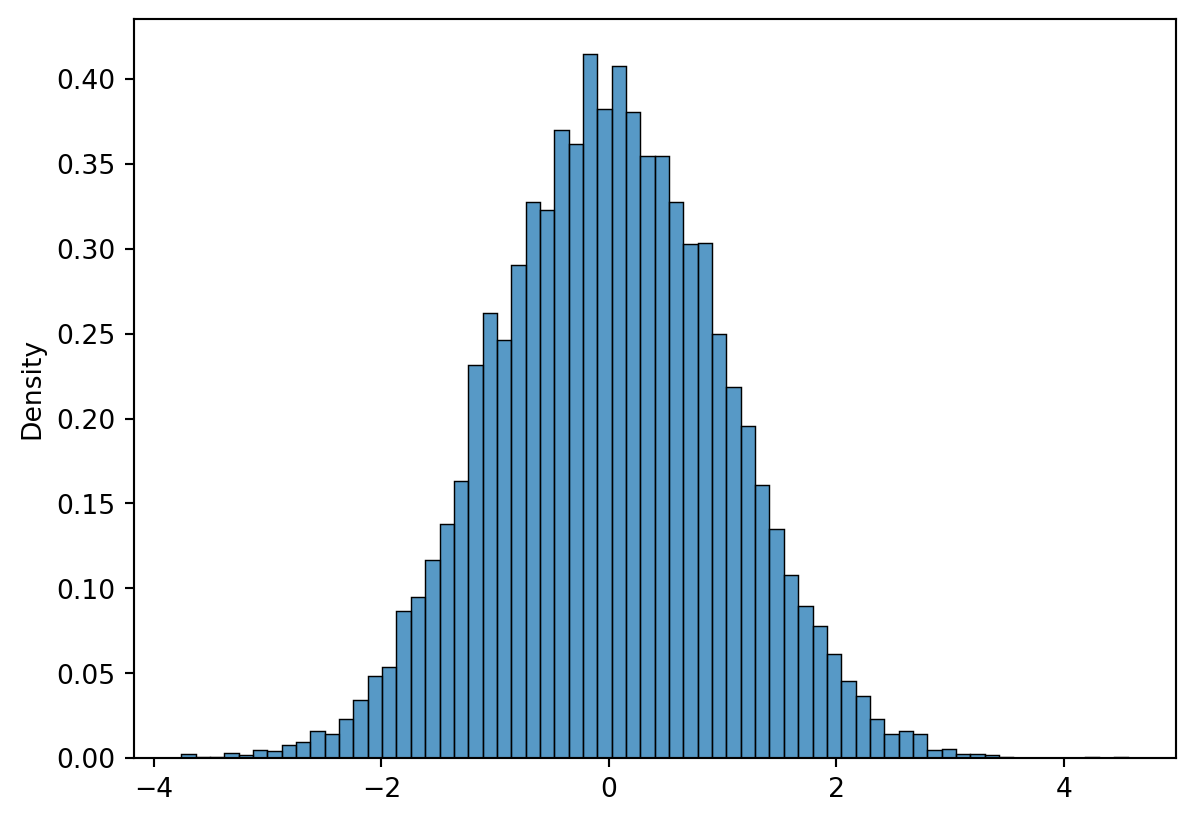

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.clf()
sns.histplot(x, stat = "density")
plt.show()

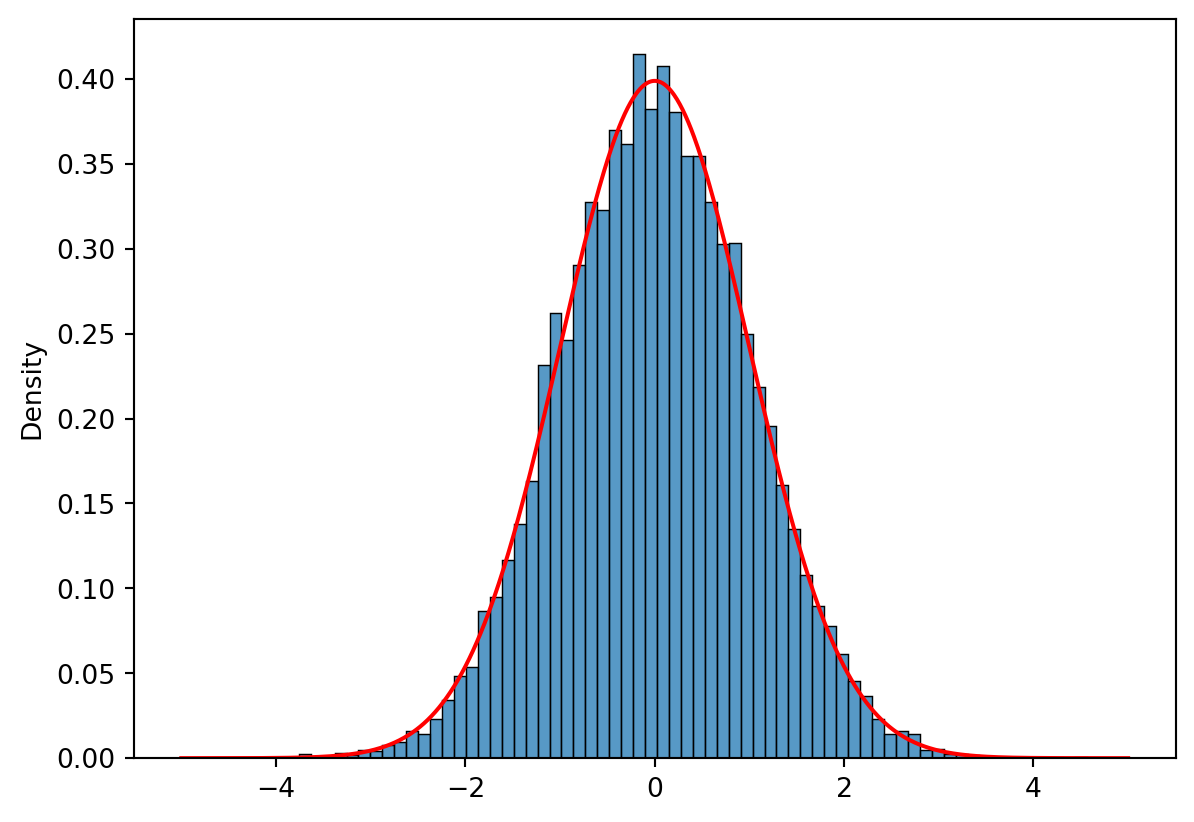

In [11]:
y = np.linspace(-5, 5, 1000)
def normpdf(x, mu = 0, sigma = 1):
  return np.exp(-(x - mu) ** 2 * 0.5) * 1/(np.sqrt(2 * np.pi) * sigma)

plt.clf()
sns.histplot(x, stat = "density")
plt.plot(y, normpdf(y), color = "red")
plt.show()

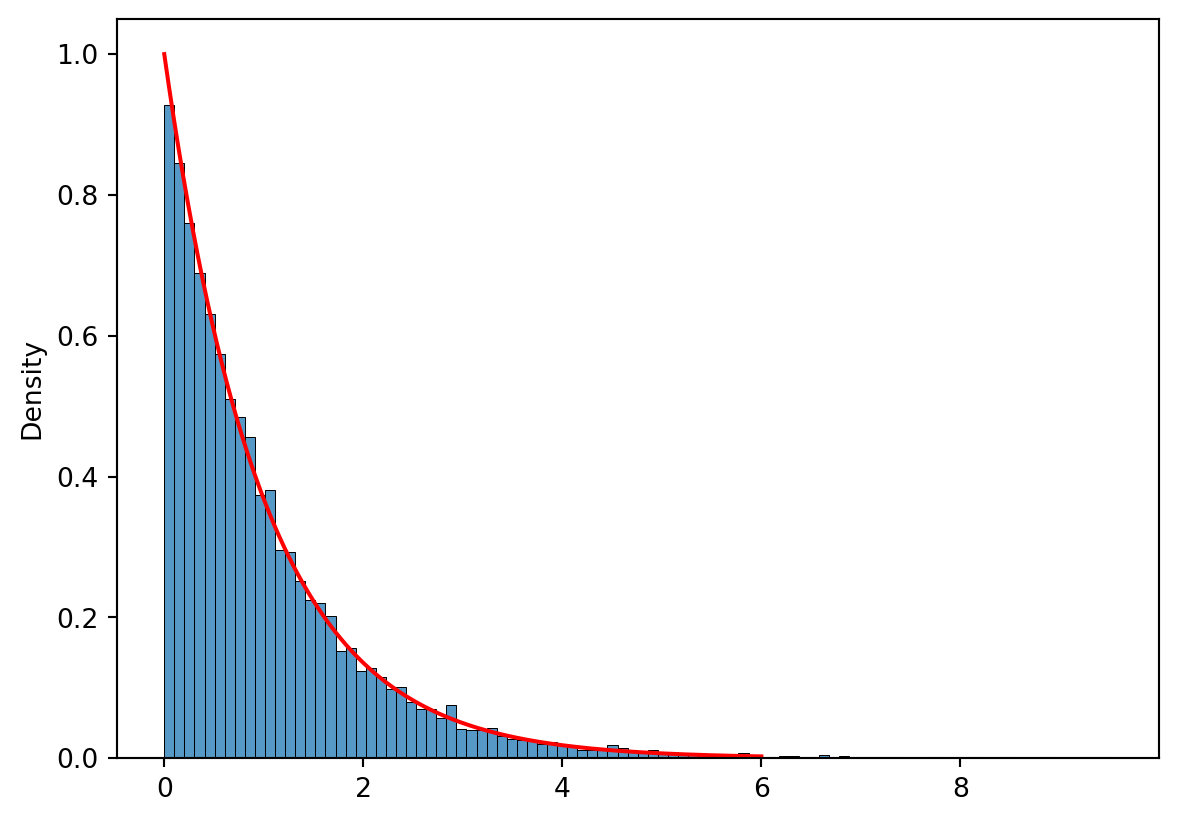

In [12]:
x = rng1.standard_exponential(10000)
y = np.linspace(0, 6, 1000)
plt.clf()
sns.histplot(x, stat = "density")
plt.plot(y, np.exp(-y), color = "red")
plt.show()

In [13]:
rng = np.random.default_rng(seed = 313)
throws = rng.integers(1, 7, size = (10000, 2))
# throws contaisn 10000 rows of two dice throws.
totals = throws.sum(axis = 1)
maxs = throws.max(axis = 1)
(totals, maxs)

(array([6, 5, 6, ..., 9, 8, 9], dtype=int64),
 array([4, 3, 5, ..., 6, 5, 6], dtype=int64))

In [14]:
x = np.logical_or(totals == 7, maxs == 6)
x

array([False, False, False, ...,  True, False,  True])

In [15]:
x.mean()

0.4134

In [16]:
def prob(rng, n_reps = 10000):
  throws = rng.integers(1, 7, size = (10000, 2))
  return np.logical_or(throws.sum(axis = 1) == 7, throws.max(axis = 1) == 6).mean()
  
prob(rng)

0.422

In [17]:
rng = np.random.default_rng(seed = 313)
prob(rng)

0.4134

In [18]:
rng = np.random.default_rng(seed = 313)
x = rng.exponential(scale = 2, size = (10000, 10))
minimas = x.min(axis = 1)

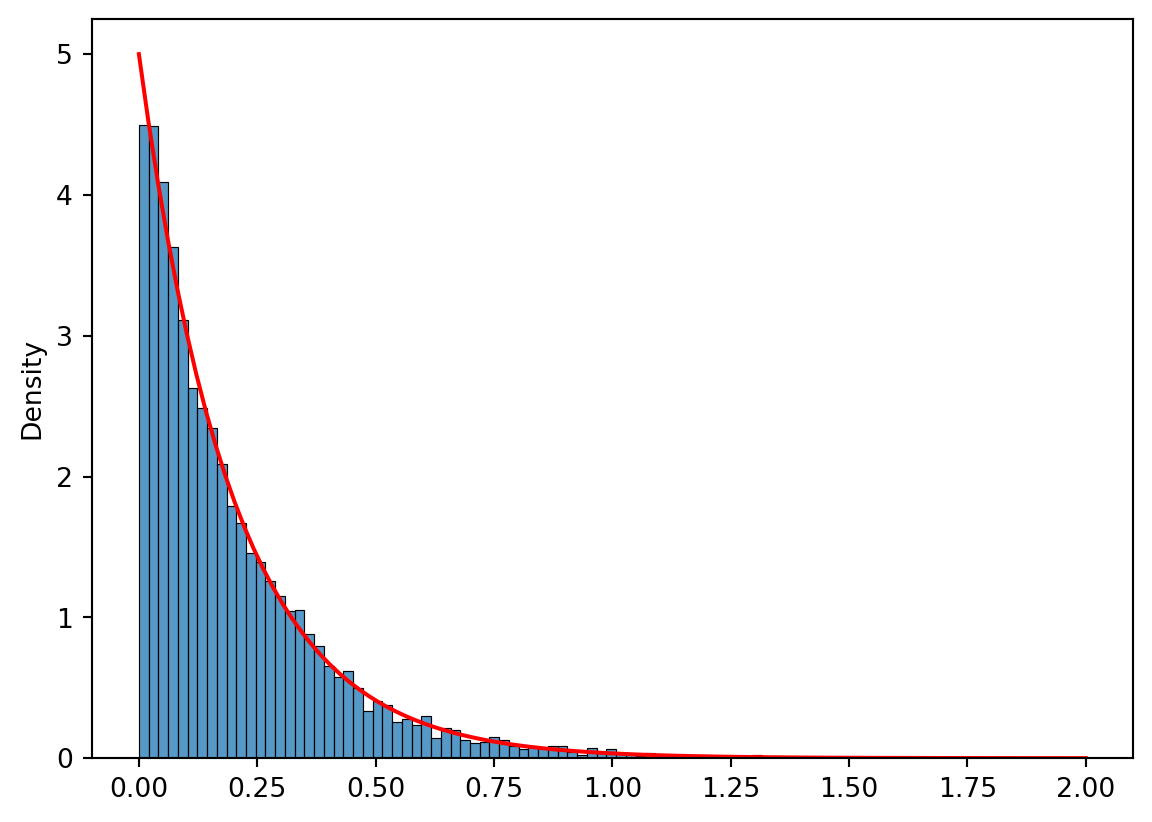

array([0.01273357, 0.26827137, 0.0231306 , ..., 0.03719032, 0.08173748,
       0.074854  ])

In [19]:
plt.clf()
sns.histplot(minimas, stat = "density")
y = np.linspace(0, 2, 100)
plt.plot(y, 10/2 * np.exp(-10/2 * y), color = "red")
plt.show()
minimas

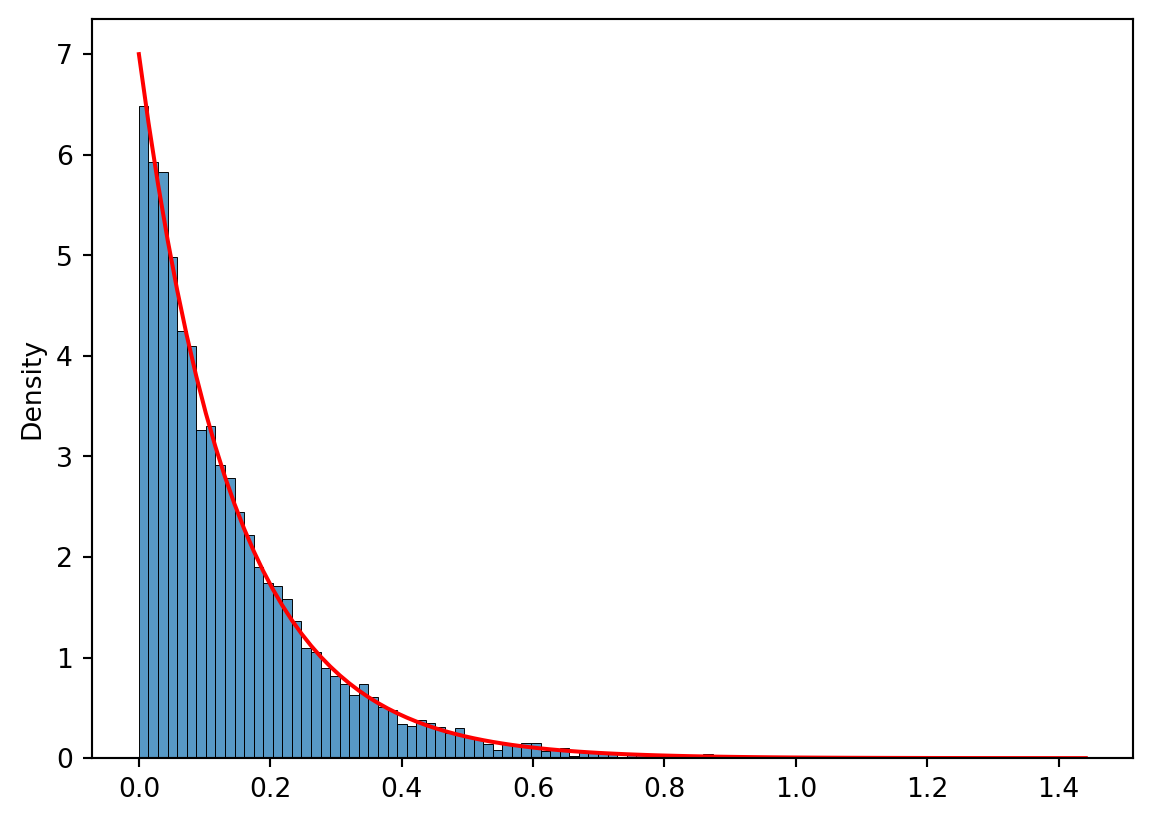

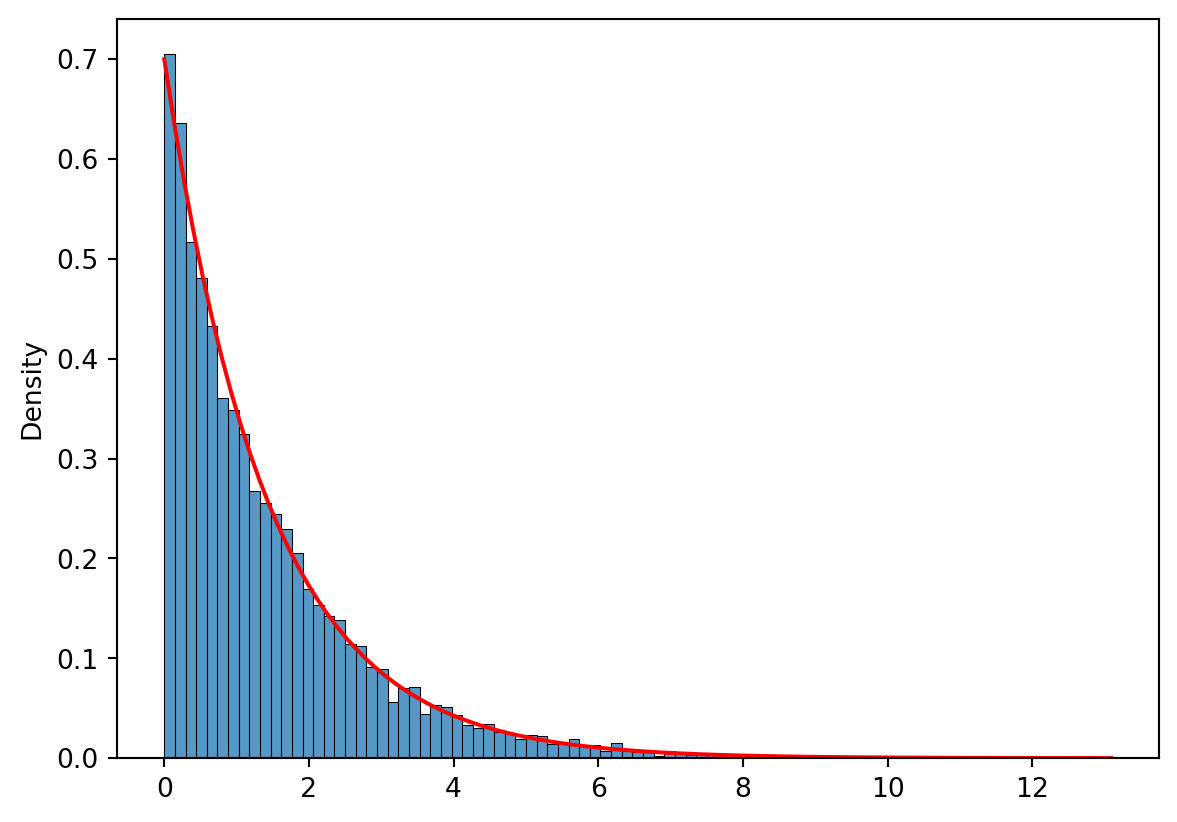

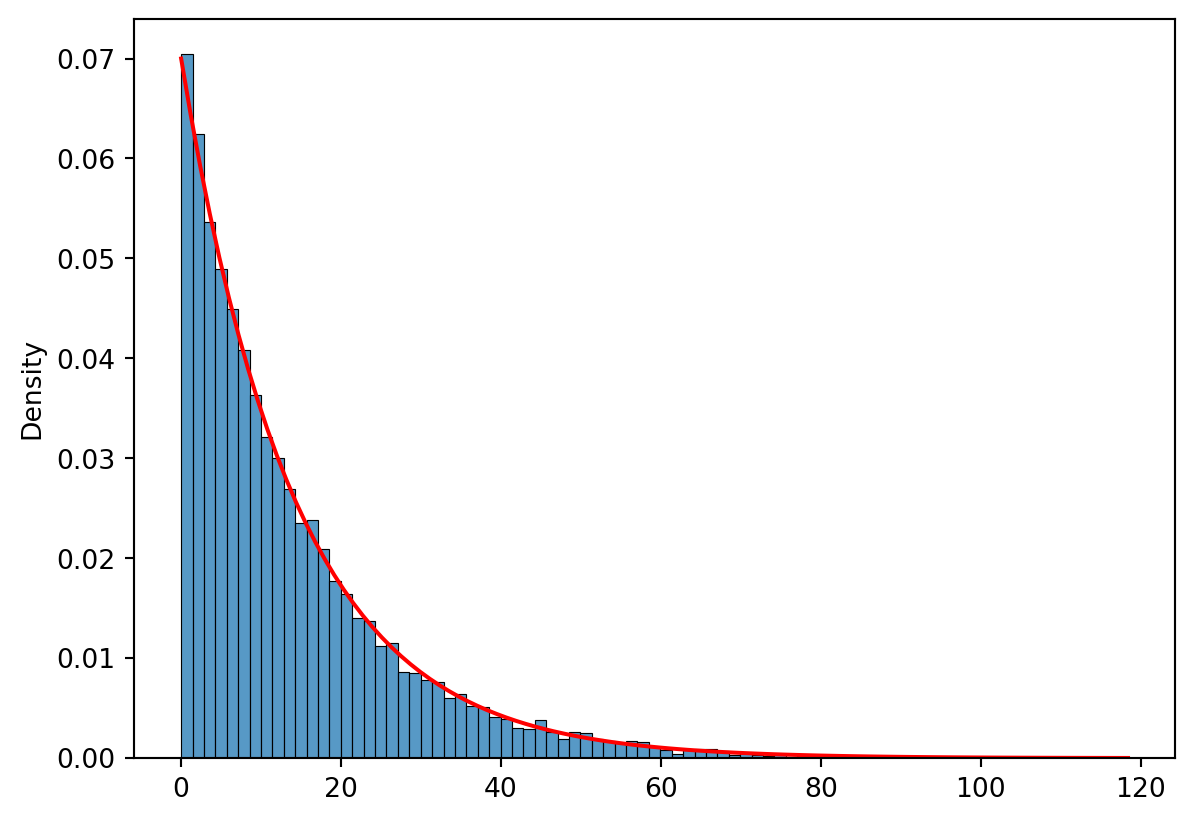

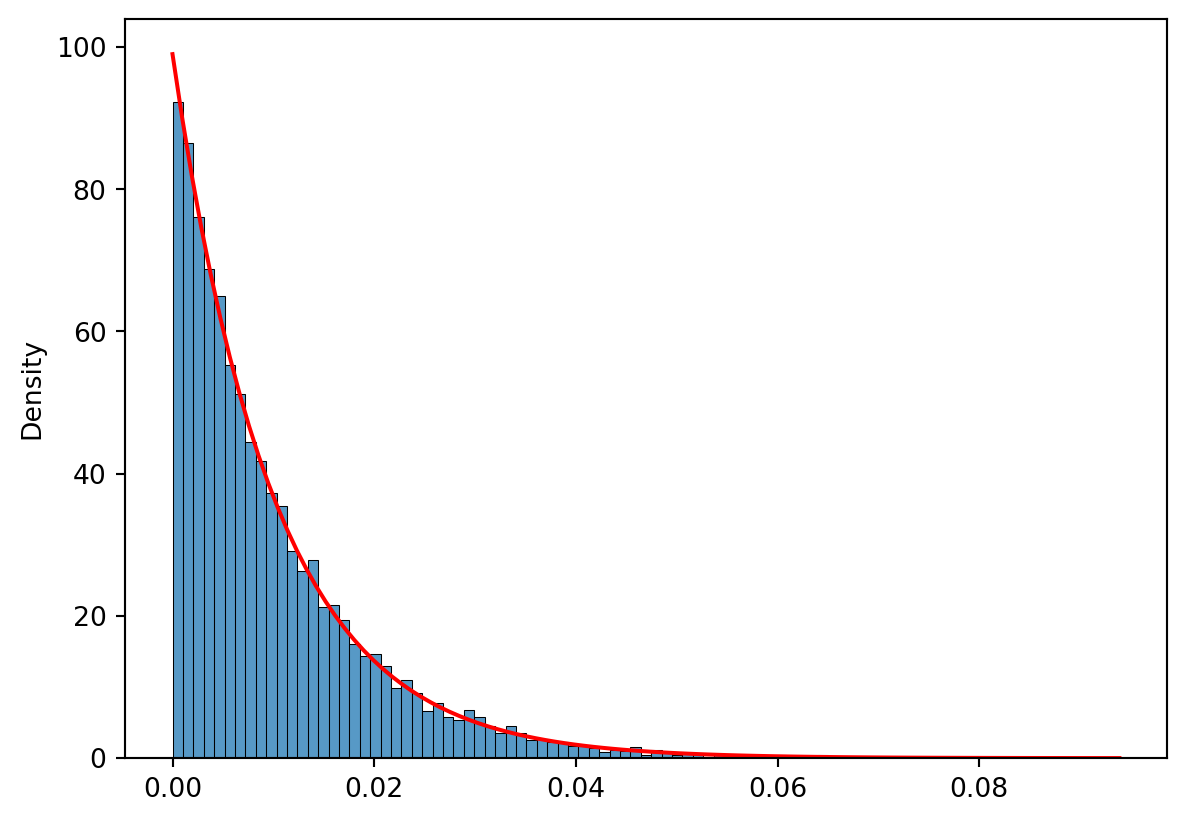

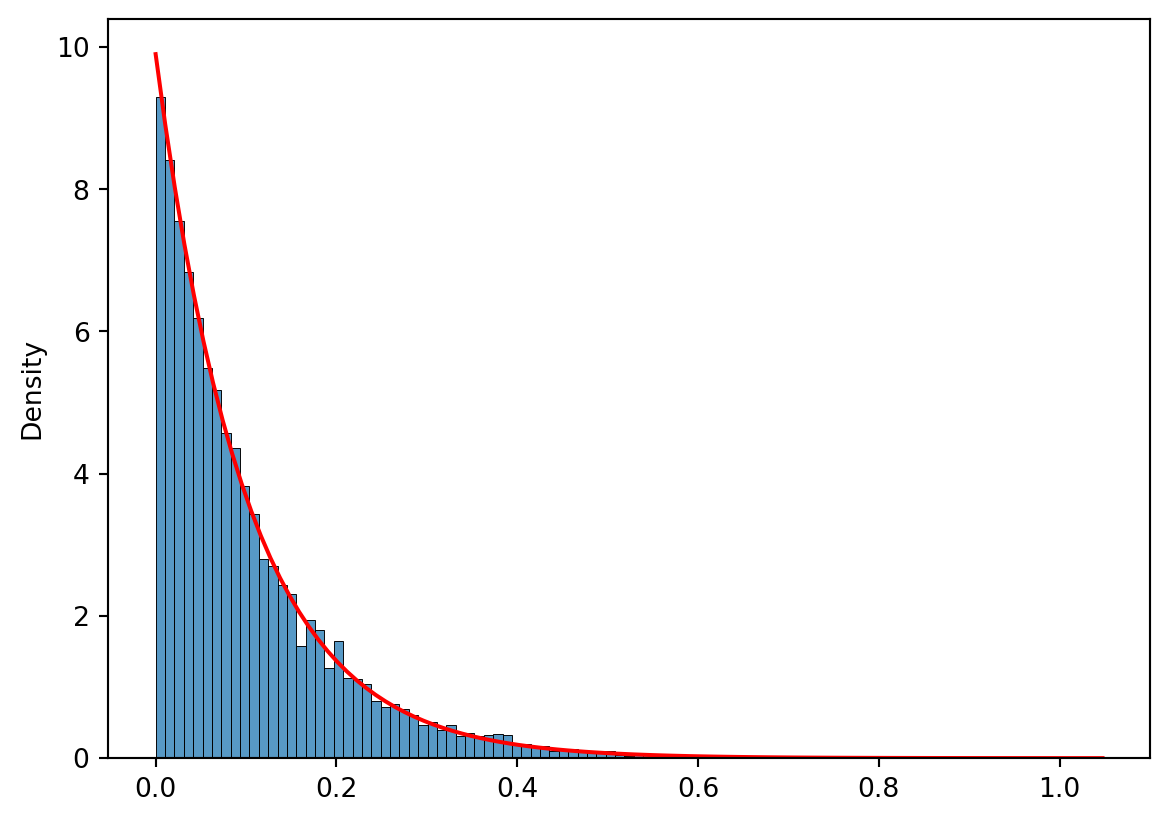

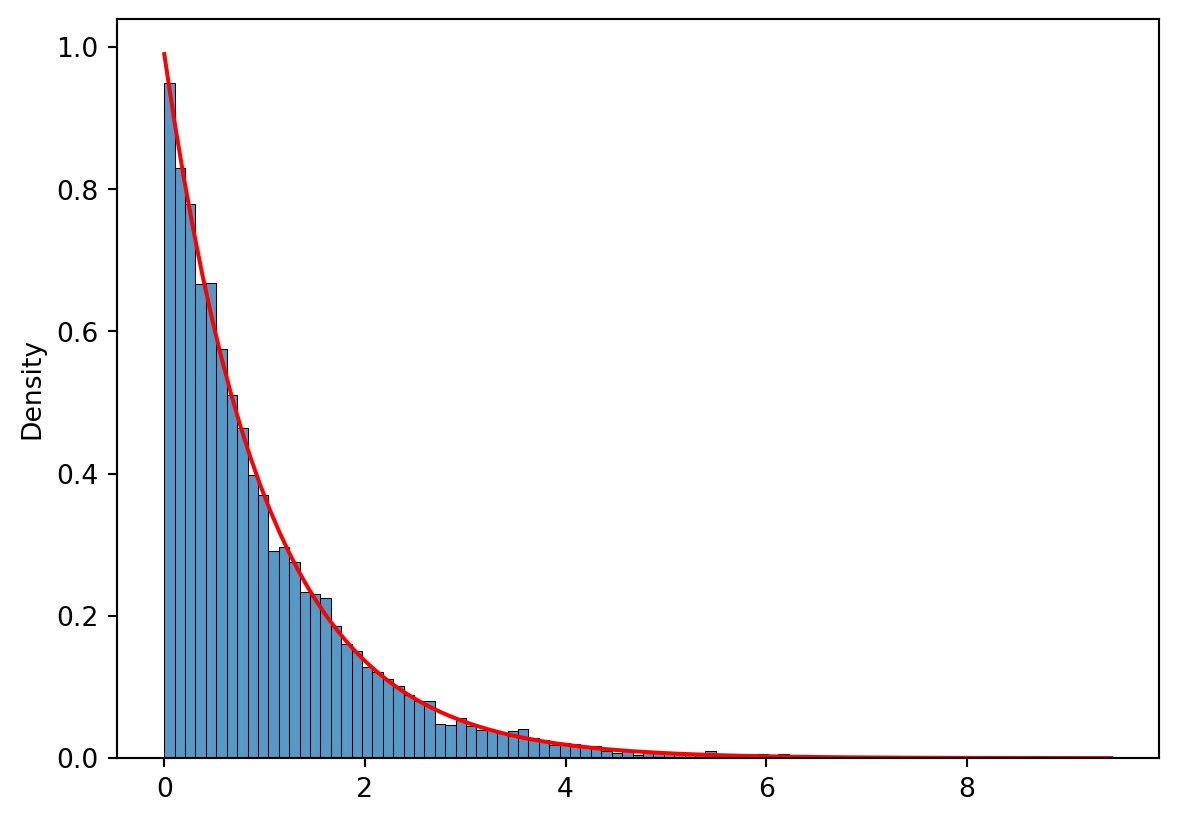

In [20]:
rng = np.random.default_rng(seed = 313)
def plotter(rng, beta, k):
  x = rng.exponential(scale = beta, size = (10000, k))
  minimas = x.min(axis = 1)
  sns.histplot(minimas, stat = "density")
  y = np.linspace(0, minimas.max(), 100)
  plt.plot(y, k/beta * np.exp(-k/beta * y), color = "red")
  plt.show()

plt.clf()
plotter(rng, 1, 7)
plt.clf()
plotter(rng, 10, 7)
plt.clf()
plotter(rng, 100, 7)
plt.clf()
plotter(rng, 1, 99)
plt.clf()
plotter(rng, 10, 99)
plt.clf()
plotter(rng, 100, 99)


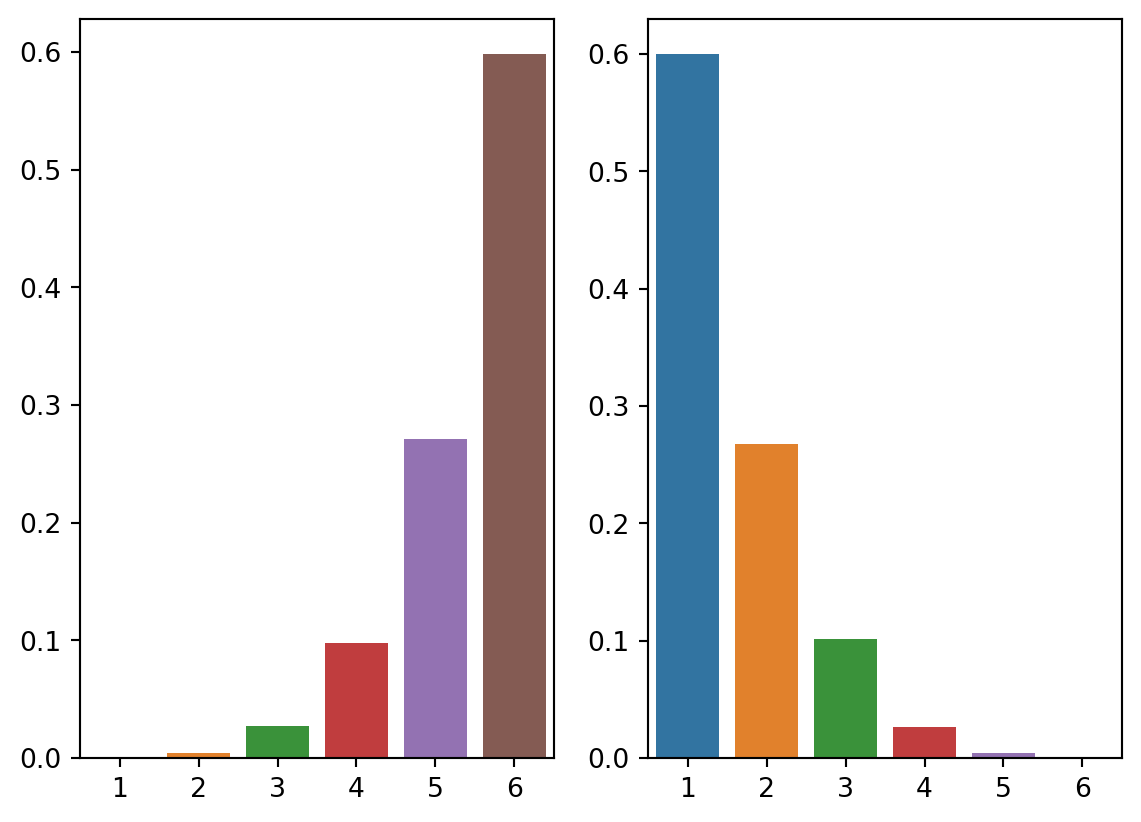

In [21]:
def maximum_throw(throws, rng, n_reps = 10 ** 5):
    """ 
    Returns a dictionary where "face" is the face of the die and "probability"
    is the approximate probability that said face is the maximal die after
    "throws" throws of the dice.

    n_reps is the number of repetitions used in the simulation.
    """
    results = rng.integers(low = 1, high = 6 + 1, size = (n_reps, throws))
    maximums = np.apply_along_axis(func1d = np.max, axis = 1, arr = results)
    uniques, counts = np.unique(maximums, return_counts = True)
    return {"face" : uniques, "probability" : counts / n_reps}

def minimum_throw(throws, rng, n_reps = 10 ** 5):
    """ 
    Returns a dictionary where "face" is the face of the die and "probability"
    is the approximate probability that said face is the minimal die after
    "throws" throws of the dice.

    n_reps is the number of repetitions used in the simulation; rng is a 
    random number generator.
    """
    sims = rng.integers(low = 1, high = 6 + 1, size = (n_reps, throws))
    results = np.apply_along_axis(func1d = np.min, axis = 1, arr = sims)
    uniques, counts = np.unique(results, return_counts = True)
    return {"face" : uniques, "probability" : counts / n_reps}

# Let's simulate and plot!
minimal_throws = minimum_throw(5, rng = rng)
maximal_throws = maximum_throw(5, rng = rng)

fig, ax = plt.subplots(1,2)
sns.barplot(x = "face", y = "probability", data = maximal_throws, ax = ax[0])
sns.barplot(x = "face", y = "probability", data = minimal_throws, ax = ax[1])
plt.show()

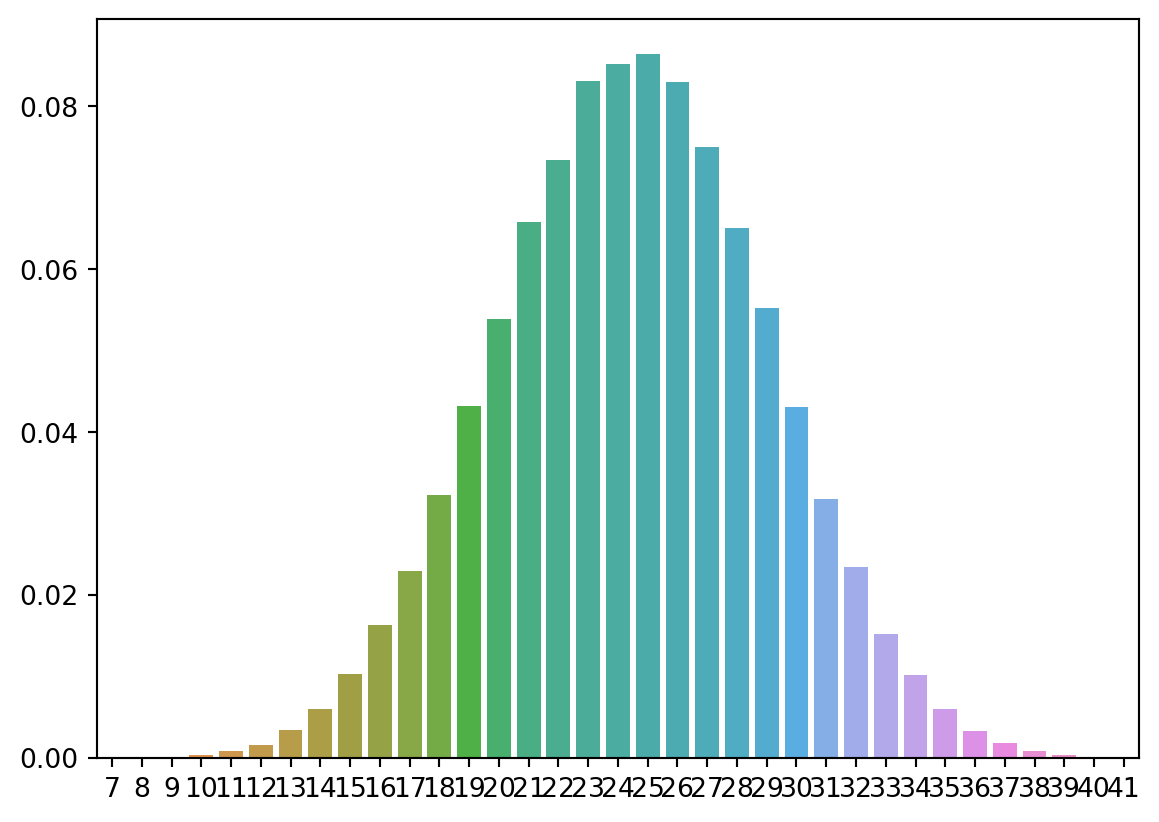

In [22]:
def sum_throw(throws, rng, n_reps = 10 ** 5):
    """ 
    Returns a dictionary where "sum" is the sum of the dice and "probability"
    is the approximate probability that said sum occured.

    n_reps is the number of repetitions used in the simulation.
    """
    results = rng.integers(low = 1, high = 6 + 1, size = (n_reps, throws))
    maximums = np.apply_along_axis(func1d = np.sum, axis = 1, arr = results)
    uniques, counts = np.unique(maximums, return_counts = True)
    return {"sum" : uniques, "probability" : counts / n_reps}

# Let's simulate and plot!
simulated_throws = sum_throw(7, rng = rng)
sns.barplot(
    x = "sum", 
    y = "probability", 
    data = simulated_throws)
plt.show()

In [23]:
def sum_expected(throws, rng, n_reps = 10 ** 5):
    """ 
    Approximates the expected value of sum of "throws" dice throws.

    n_reps is the number of repetitions used in the simulation; rng is a 
    random number generator.
    """
    simulated_throws = sum_throw(throws, rng)
    sums = simulated_throws["sum"]
    probabilities = simulated_throws["probability"]
    return np.sum(sums * probabilities)

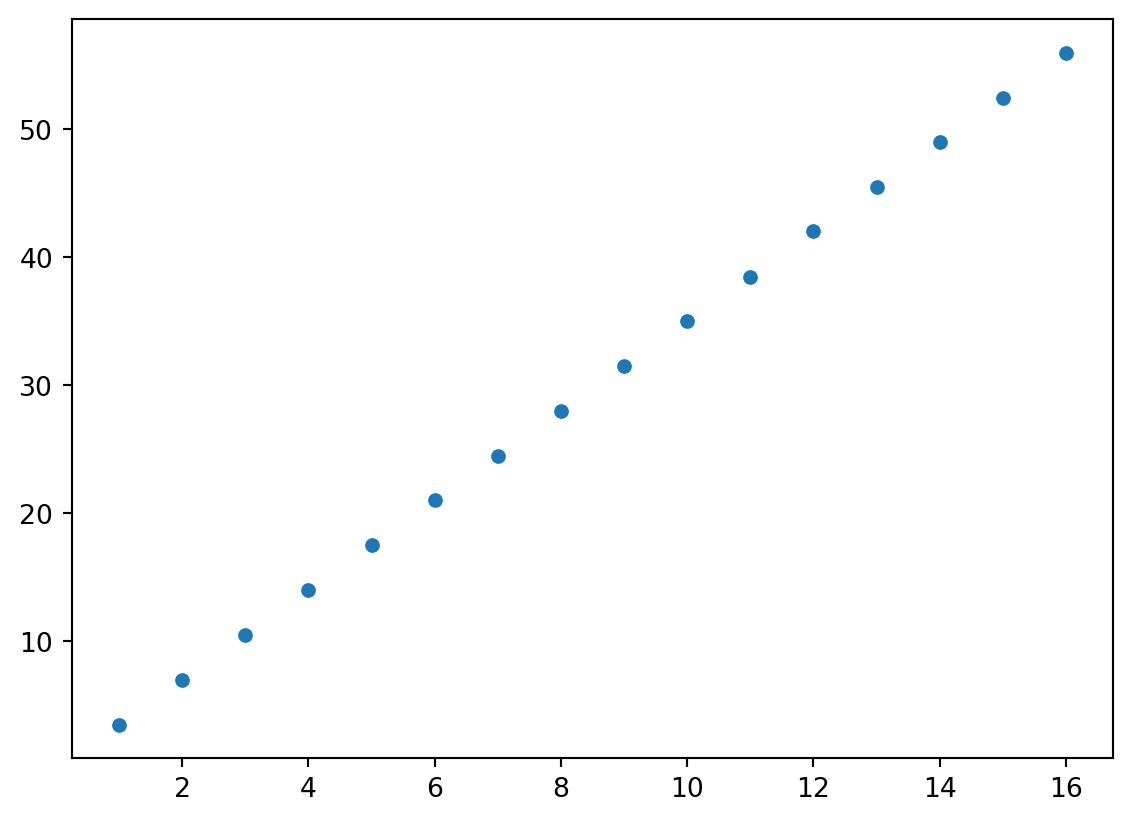

In [24]:
xs = range(1, 17)
ys = [sum_expected(throws, rng) for throws in xs]
sns.scatterplot(x = xs, y = ys) # Expects the function y = a*x for some a!
plt.show()

In [25]:
def product_throw(throws, rng, n_reps = 10 ** 5):
    """ 
    Returns a dictionary where "product" is the product of "throws" throws and 
    "probability" is the approximate probability that the product equals 
    "product".

    n_reps is the number of repetitions used in the simulation; rng is a 
    random number generator.
    """
    sims = rng.integers(low = 1, high = 6 + 1, size = (n_reps, throws))
    results = np.apply_along_axis(func1d = np.product, axis = 1, arr = sims)    
    uniques, counts = np.unique(results, return_counts = True)
    return {"product" : uniques, "probability" : counts / n_reps}

simulated_throws = product_throw(5, rng)
# The probability that the product exceeds 3888:
products = simulated_throws["product"]
probabilities = simulated_throws["probability"]
sum([probabilities[i] for i, _ in enumerate(products) if products[i] > 3888])

### Coda: Always a good idea to generalize your functions!

def throw_dice(throws, func, rng, n_reps = 10 ** 5):
    """ 
    Returns a dictionary where "result" is the result of applying func to 
    "throws" throws and "probability" is the approximate probability that the 
    result equals "result".

    n_reps is the number of repetitions used in the simulation.
    """
    
    simulation = rng.integers(low = 1, high = 7, size = (n_reps, throws))
    result = np.apply_along_axis(func1d = func, axis = 1, arr = simulation)    
    uniques, counts = np.unique(products, return_counts = True)
    return {"result" : uniques, "probability" : counts / n_reps}